To process and get insights the data, there are 4 main steps:

1. Clea data, check duplicates and deduplicates, checking missing values
2. Understand features, both categorical and numerical, and do some data transformation
3. Data visualization on some features

In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder_path = os.getcwd()

#    Step 1: Read raw data

In [3]:
print("Reading raw data...")
df_raw = pd.read_csv(folder_path + '/product_ds_exercise_2018_h2_dataset (2) (2) (1) (2).csv')
print("There are {0} data points and {1} columns in the raw data".format(df_raw.shape[0],df_raw.shape[1]))
df_raw.head()

Reading raw data...
There are 12357 data points and 11 columns in the raw data


,id,city_name,signup_os,signup_channel,signup_timestamp,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_trip_timestamp
0,082befb0-c1de-4c14-8700-94a7943a7545,Strark,NaN,R2D,2017-07-06T20:42:17Z,NaN,2017-07-06T20:42:56Z,Volkswagen,CC,2012,NaN
1,1ae6156f-63fc-40cf-9734-0995978c4b6e,Berton,ios web,Dost,2017-07-03T17:41:07Z,2017-07-03T17:42:06Z,2017-07-03T17:41:14Z,Toyota,4Runner,2003,2017-07-23T00:26:50Z
2,2a4a4eef-14ef-4ceb-82eb-66f1f7d0d219,Berton,NaN,R2D,2017-07-10T22:55:29Z,NaN,2017-07-11T17:44:44Z,Hyundai,Elantra,2015,NaN
3,56fe7597-3ad8-4798-8be8-5fbc4e2d3151,Berton,ios web,Referral,2017-07-27T18:27:21Z,2017-07-27T18:31:43Z,2017-07-27T18:31:09Z,Honda,Civic,2017,2017-07-31T04:07:24Z
4,67370341-68a5-415f-acf2-be58832a8f9c,Wrouver,other,Referral,2017-07-17T22:20:35Z,2017-07-17T22:21:09Z,2017-07-17T22:20:53Z,Honda,Accord,1999,NaN


# Step 2: Check duplicates and missing values

In [4]:
print("Checking duplicates...")
if df_raw.duplicated().any() == False:
    print("No duplicates found in the raw data")
else:
    print("Duplicates found:")
    print("{0} duplicated rows identified. Please deduplicates before conducting any analysis".format(len(df_raw[df_raw.duplicated() == True])))

Checking duplicates...
Duplicates found:
379 duplicated rows identified. Please deduplicates before conducting any analysis


In [5]:
df_dedupe_rows = df_raw[df_raw.duplicated() == False]

In [6]:
print("{} rows remained after omitting the duplicated rows".format(df_dedupe_rows.shape[0]))

11978 rows remained after omitting the duplicated rows


In [7]:
print("Checking duplicated driver_id...")
if df_dedupe_rows['id'].duplicated().any() == True:
    print("{} duplicated driver_id(s) found".format(len(df_dedupe_rows[df_dedupe_rows['id'].duplicated() == True])))
    
else:
    print("No duplicated driver_id found, continue.")

Checking duplicated driver_id...
323 duplicated driver_id(s) found


In [8]:
duplicate_ids = df_dedupe_rows[df_dedupe_rows['id'].duplicated() == True].id

Check the duplicated ids, if the first_completed_trip_timestamps are different in the duplicated rows;
if yes, save to the flag_ids list

In [9]:
flag_ids = []
for idx in duplicate_ids:
    value_list = df_dedupe_rows[df_dedupe_rows.id == idx]['first_completed_trip_timestamp'].values
    if len(set(value_list)) != 1:
        flag_ids.append(idx)
        

In [11]:
print("{} different first_completed_trip_timestampe on same driver_ids found".format(len(flag_ids)))

0 different first_completed_trip_timestampe on same driver_ids found


In [12]:
dedupe_ids = df_dedupe_rows[df_dedupe_rows.id.duplicated() == False]

In [13]:
print("Unique driver_id:{}".format(len(dedupe_ids)))

Unique driver_id:11655


Check missing values

In [14]:
dedupe_ids.isnull().sum()

id                                   0
city_name                            0
signup_os                         5106
signup_channel                    1144
signup_timestamp                  1111
bgc_date                          4306
vehicle_added_date                1170
vehicle_make                       591
vehicle_model                        0
vehicle_year                         0
first_completed_trip_timestamp    5383
dtype: int64

Except for id, city_name, vehicle_model, vehicle_year, all other columns have missing values

# Step 3: Exploratory Data Analysis and Data Visualization

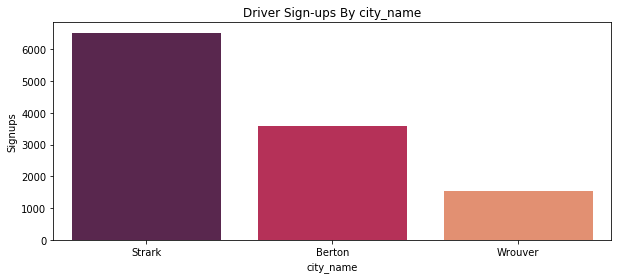

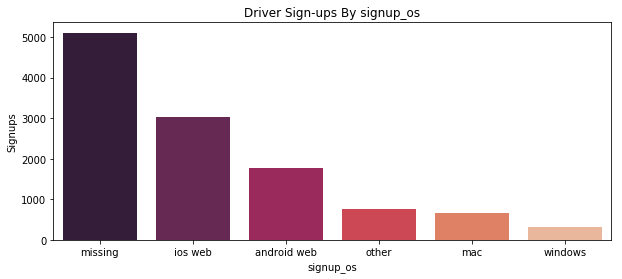

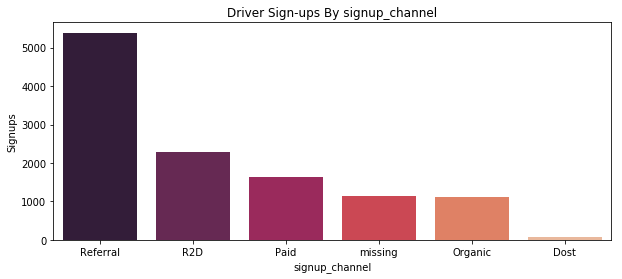

In [15]:
df_temp = dedupe_ids.fillna("missing")
for v in ['city_name','signup_os','signup_channel']:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df_temp[v].value_counts().index.tolist(), y=df_temp[v].value_counts().values.tolist(), palette="rocket")
    plt.title("Driver Sign-ups By {}".format(v))
    plt.xlabel("{}".format(v))
    plt.ylabel("Signups")

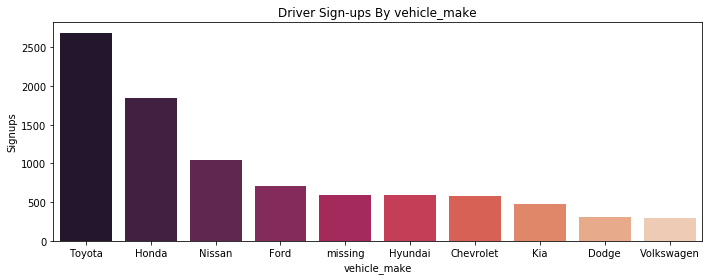

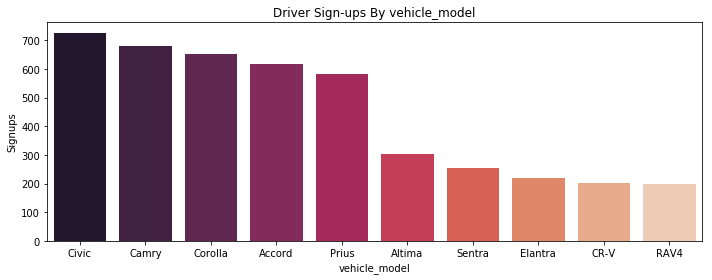

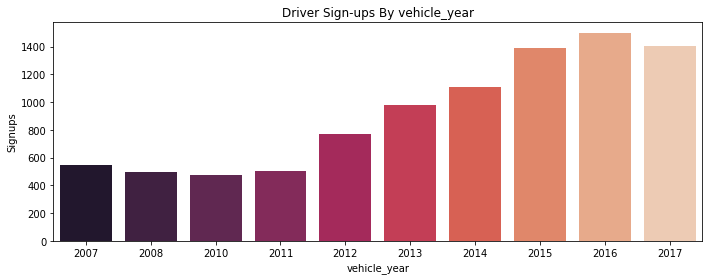

In [16]:
for v in ['vehicle_make','vehicle_model','vehicle_year']:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df_temp[v].value_counts().index.tolist()[:10], y=df_temp[v].value_counts().values.tolist()[:10], palette="rocket")
    plt.title("Driver Sign-ups By {}".format(v))
    plt.xlabel("{}".format(v))
    plt.ylabel("Signups")
    plt.tight_layout()

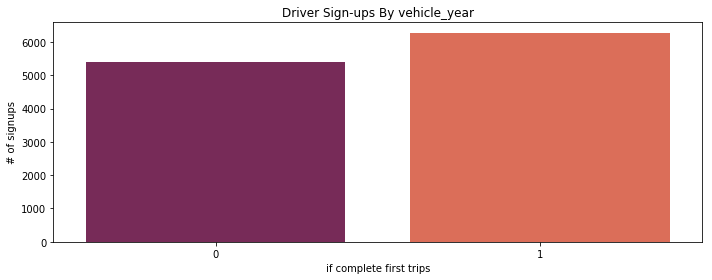

In [17]:
df_temp['complete_first_trip'] = df_temp['first_completed_trip_timestamp'].apply(lambda x: 1 if x != 'missing' else 0)
plt.figure(figsize=(10,4))
sns.barplot(x=df_temp['complete_first_trip'].value_counts().index.tolist(), y=df_temp['complete_first_trip'].value_counts().values.tolist(), palette="rocket")
plt.title("Driver Sign-ups By {}".format(v))
plt.xlabel("if complete first trips")
plt.ylabel("# of signups")
plt.tight_layout()

Some insights:
We could tell from the plots above that
1. Signups are from three cities, Strark, Berton and Wrouver. Most signups were from Strark. 
2. Most of the signup_os were missing; iso_web has the highest sign-ups, windows has the lowest signups.
3. For sign-up channels, most sign-ups are through Referral, which might because "Referral" would give out bonus money; even though there were still some missing values, most of the information has been tracked. 
4. Vahnicle make, model and year have too much difference values, so I only plot the top 10 makes, models and year. Toyota, Honda and Nissan are the top three vehnicle make that have the ighest signups; and top three vehicle model Civic, Camry and Corolla fall into these three vehicle make. And we can also see that most drivers are using new cars, 2016, 2015 and 2017;
5. The last chart shows that, more drivers completed the trips than drivers who didn't complete the trips


# Part A

In [18]:
no_first_trips = dedupe_ids[dedupe_ids['first_completed_trip_timestamp'].isnull() == True]
first_trips = dedupe_ids[dedupe_ids['first_completed_trip_timestamp'].isnull() == False]
print("{} drivers haven't completed first trips after sign-up".format(len(no_first_trips)))
print("{} drivers completed first trips after sign-up".format(len(first_trips)))

5383 drivers haven't completed first trips after sign-up
6272 drivers completed first trips after sign-up


In [19]:
print("{} drivers are missing sign_up dates".format(dedupe_ids['signup_timestamp'].isnull().sum()))
print("{} drivers who completed first trips have missing sign_up dates".format(first_trips['signup_timestamp'].isnull().sum()))
print("{} drivers who didn't complete first trips have missing sign_up dates".format(no_first_trips['signup_timestamp'].isnull().sum()))

1111 drivers are missing sign_up dates
600 drivers who completed first trips have missing sign_up dates
511 drivers who didn't complete first trips have missing sign_up dates


In [20]:
all_signups = dedupe_ids[dedupe_ids['signup_timestamp'].isnull() == False]

In [21]:
temp = first_trips[(first_trips['signup_timestamp'].isnull() == False)]

In [22]:
def string_to_date(string):
    return datetime.strptime(string, '%Y-%m-%dT%H:%M:%SZ')

In [23]:
temp['days_for_first_trips'] = temp.apply(lambda x: (string_to_date(x['first_completed_trip_timestamp']).date()- string_to_date(x['signup_timestamp']).date()).days,axis = 1)

/Users/Stella/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
print("There are {} total distinct driver signups".format(len(dedupe_ids)))
print("{} of them completed first trips after signups".format(len(first_trips)))
print("{} of them didn't complete first trips after signups".format(len(no_first_trips)))
print("\n")
print("Among drivers who have exact signup_timstamp")
print("{} total drivers finished first trips within 30 days".format(len(temp[temp['days_for_first_trips'] <= 30])))
print("About {0:.0%} total drivers finished first trips within 30 days".format(len(temp[temp['days_for_first_trips'] <= 30])/len(all_signups)))

print("Among all drivers who completed first trips, {0:.0%} finished first trips within 30 days".format(len(temp[temp['days_for_first_trips'] <= 30])/len(all_signups[all_signups['first_completed_trip_timestamp'].isnull() == False])))


There are 11655 total distinct driver signups
6272 of them completed first trips after signups
5383 of them didn't complete first trips after signups


Among drivers who have exact signup_timstamp
5672 total drivers finished first trips within 30 days
About 54% total drivers finished first trips within 30 days
Among all drivers who completed first trips, 100% finished first trips within 30 days


## Discussion:
I found 600 missing signups_timestamp, but these signups were valid signups, and there were corresponding first_completed_trip_timestamp values. To calculate the fraction of drivers who completed first trips within 30 days, i deleted those data points without signup_timestamp.

# Part B

To better address this problem, i only use the driver signup data without missing values for signup_timestamp. 

## Generate Labels

## Explore Features and Feature Engineer

There are 6 categorical features in this dataset: city_name, signup_os,signup_channel,vehicle_make,vehicle_model; and four numerical/date related features:vehicle_year, signup_timestamp,bgc_date,behicle_added_date. Since there are some missing values in these columns, indicating columns are needed to indicate if the value is missing; and for those column value that only appears for a few times, we could delete them.

First, we can take a look at the effect of these categorical features

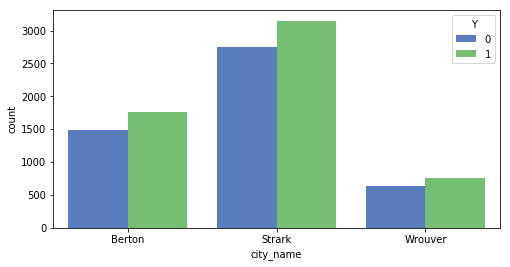

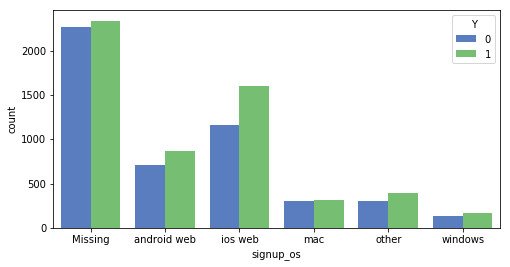

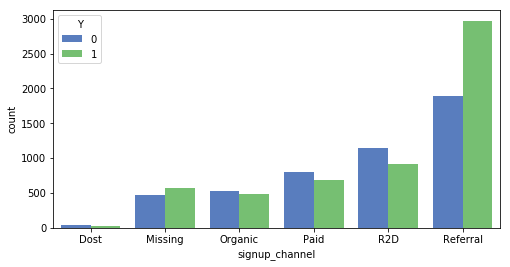

In [30]:
for v in ['city_name','signup_os','signup_channel']:
    temp = df_full[[v,'Y']]
    temp = temp.groupby([v,'Y']).size().reset_index(name='count')
    plt.figure(figsize=(8,4))
    sns.barplot(x=v, y="count", hue="Y", data=temp,palette="muted")

For city_name and signup_os, each category seems to have positive effect on "completed first trips within 30 days"; but for signup_channel, drivers signed up through "Paid"m "R2D" and "Organic" tend to not complete their first trips within 30 days, which have the negative effect on "compeleted first trips within 30 days"; drivers signed up through "Referral" has the most positive effect on "completed first trips within 30 days".

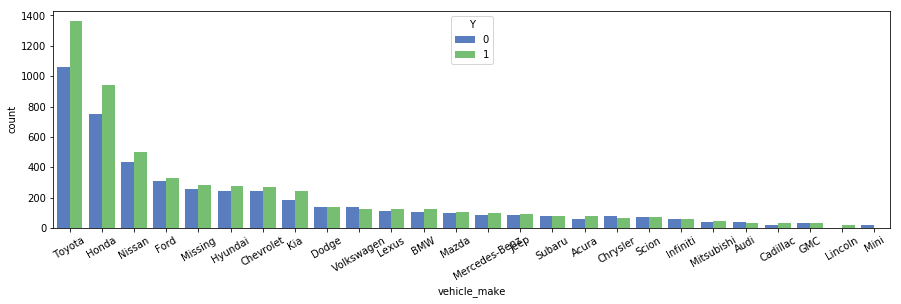

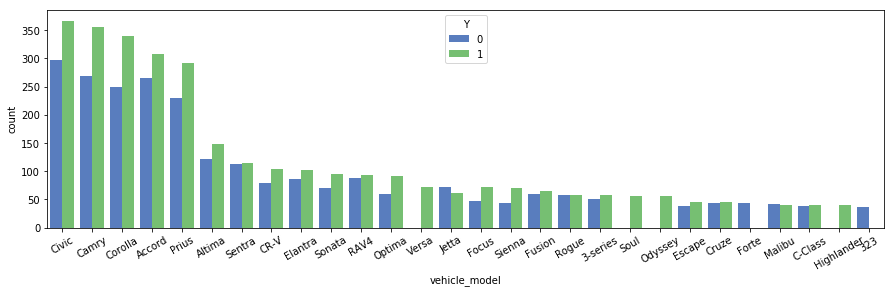

In [31]:
for v in ['vehicle_make','vehicle_model']:
    temp = df_full[[v,'Y']]
    temp = temp.groupby([v,'Y']).size().reset_index(name='count').sort_values(by='count',ascending=False)
    plt.figure(figsize=(15,4))
    g = sns.barplot(x=v, y="count", hue="Y", data=temp[:50],palette="muted")
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

For features about vehicles, because there are too many distinct values in these categories, i only plotted the top 50 rows;